In [1]:
from sympy import *


In [2]:
init_printing()

In [3]:
phi, y = symbols('phi y',real=True,nonnegative=True)
v = IndexedBase('v',real=True,positive=True)
Psi = IndexedBase('Psi',real=True,positive=True)
N, n = symbols('N n',integer=True,positive=True)

In [4]:
dNdphi = S.One + Sum(v[n]*cos(n*(phi-Psi[n])),(n,1,N))

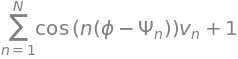

In [5]:
dNdphi

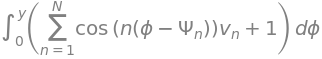

In [6]:
dNdphi.integrate((phi,0,y)).doit()

In [31]:
inner = dNdphi.args[1].args[0].integrate((phi,0,y)).simplify().trigsimp()
inner

In [8]:
N1 = S.One.integrate((phi,0,y))

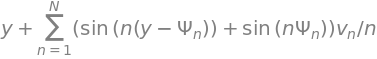

In [28]:
Ny = N1 + summation(inner,(n,1,N))
Ny

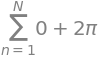

In [27]:
N0 = Ny.subs(y,2*pi).trigsimp()
N0

In [19]:
vv = [0.01,0.05,0.03]

def make_subs(vv,fac):
    sub = {N:len(vv)}
    sub.update({v[i+1]:fac*vvv for i,vvv in enumerate(vv)})
    sub.update({Psi[i+1]:0 for i,vvv in enumerate(vv)})
    return sub 

def make_pdf(vv,fac):
    return dNdphi.subs(N,len(vv)).doit().subs(make_subs(vv,fac))/(2*pi)

def make_cdf(vv,fac):
    return Ny.subs(N,len(vv)).doit().subs(make_subs(vv,fac))/(2*pi)

cc = [make_cdf(vv,f) for f in [1, .5, 2]]
pp = [make_pdf(vv,f) for f in [1, .5, 2]]
display(cc)
display(pp)


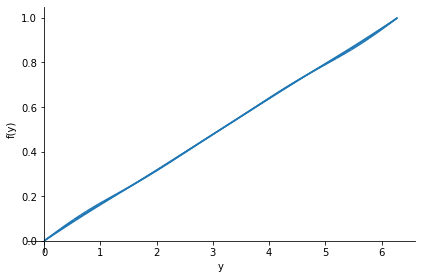

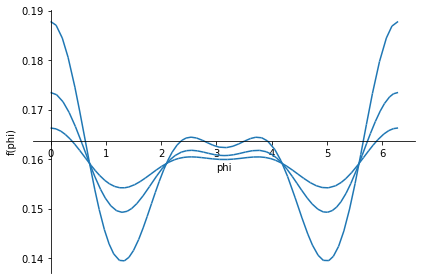

In [20]:
plot(*cc,(y,0,2*pi))
plot(*pp,(phi,0,2*pi))

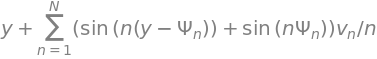

In [21]:
Ny

In [30]:
sin(n*(2*pi-Psi[n])).trigsimp()

In [32]:
a, b = symbols('a b',real=True)

In [35]:
t = (sin(a-b)+sin(b))

In [39]:
t.expand()


In [41]:
tt=sin(a)*cos(b)-cos(a)*sin(b)+sin(b)
tt

In [42]:
tt.simplify()

In [43]:
tt.trigsimp()

In [44]:
tt.factor()

In [47]:
tt.collect(sin(b)).trigsimp()